# Assignment 2
## ME 639 - Introduction to Robotics
### IIT Gandhinagar


___________________________________________________

Assigned: 21 August, 2023

Due: 11:59pm on Friday, 31st August, 2023

on GitHub: https://github.com/harishpmiitgn/ME639-Robotics-2023

Collaboration Policy: Collaboration is not permitted on this assignment. All
submitted material must be your own material.

___________________________________________________

Tasks:
1. Show that `RS(a)R_Transpose = S(Ra)` , where is a rotation matrix.


2. Work out the various coordinate frames (show them on a clearly marked
figure) and work out p(0) using a composition of homogeneous transformations for the RRP SCARA configuration.
3. Write a python code incorporating the above calculation that can return
the position vector of the end effector for any given configuration of joint
variables (angles and extension).
4. Repeat the above exercise for the Stanford-type RRP configuration, again
write a python code that can return the position vector of the end effector
for any given configuration of joint variables (angles and extension).
5. A drone took off from a base station and traveled 10m straight up. If you
consider an inertial frame attached at the base station with the z axis
pointing straight up and x and y axes along the ground forming a
right-hand system, then this would be `10m in the z direction`. At this hover
point, the drone orientation is as if it completed a `30-degree rotation about
the x-axis` followed by a `60-degree rotation about the resulting new (current)
z-axis`. Further, it is then observed using a lidar installed on the drone that
an obstacle is `3m exactly above the drone (in the drone frame)`. Find the
position vector of the obstacle with respect to the base coordinate frame
using a composition of homogeneous transformations. Also, show the
choice of coordinate frames using a neat sketch.
6. Read about a few different types of gearboxes typically used with motors in
a robotic application and explain in 2-3 sentences in your own words some
key pros and cons of each gearbox type and where it is typically used.
Further, explain if you would typically see a gearbox used along with a
motor in a drone application. Explain the reasons.
7. Derive the Manipulator Jacobian for the RRP SCARA configuration.
8. Write a python code implementing the above Jacobian such that the entire
Jacobian matrix is output for any given values of joint variables.

9. Derive the Manipulator Jacobian for the RRR configuration with all rotation
axis parallel to each other (entire robot is planar like the elbow
manipulator).
10. Write a python code implementing the above Jacobian such that the entire
Jacobian matrix is output for any given values of joint variables.


Submit the assignment in the form of a PDF along with four separate python codes for
tasks 3, 4, 8 and 10.

### Matrix Functions & Library Definations

`Run This Before running Tasks`

In [ ]:
from scipy.spatial.transform import Rotation as R
import numpy as np

import matplotlib.pyplot as plt
from itertools import product, combinations


# below option is used to show up only 2 digit after decimal point for floats
np.set_printoptions(formatter={'float_kind': "{: .2f}".format})

In [ ]:
class H:
  def from_euler(order='z', rotation=90, translation=[0, 0, 0], degree=True):
  #def from_euler(order='xyz', rotation=[0, 0, 0], translation=[0, 0, 0], degree=True):

    th = np.pi*rotation/180

    if order=='x':
      arr = np.array([
          [1,       0,             0,       translation[0]],
          [0,   np.cos(th),   -np.sin(th),  translation[1]],
          [0,   np.sin(th),   np.cos(th),   translation[2]],
          [0,   0,            0,            1             ]
      ])
    elif order=='y':
      arr = np.array([
          [np.cos(th),      0,     np.sin(th),  translation[0]],
          [0,               1,        0,        translation[1]],
          [-np.sin(th),     0,     np.cos(th),  translation[2]],
          [0,   0,            0,            1                 ]
      ])
    elif order=='z':
      arr = np.array([
          [np.cos(th),      -np.sin(th),    0, translation[0]],
          [np.sin(th),      np.cos(th),     0, translation[1]],
          [0,                   0,          1, translation[2]],
          [0,   0,            0,            1                ]
      ])

    return arr

r = H.from_euler('z', 90)
r

array([[ 0.00, -1.00,  0.00,  0.00],
       [ 1.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  1.00,  0.00],
       [ 0.00,  0.00,  0.00,  1.00]])

In [ ]:
r @ r.transpose()   #p.matmul(r, r.transpose())

array([[ 1.00,  0.00,  0.00,  0.00],
       [ 0.00,  1.00,  0.00,  0.00],
       [ 0.00,  0.00,  1.00,  0.00],
       [ 0.00,  0.00,  0.00,  1.00]])

In [ ]:
def get_rot_mat(P0):
  P = []
  P.append(P0[0][0:3])
  P.append(P0[1][0:3])
  P.append(P0[2][0:3])

  return R.from_matrix(P)

r = get_rot_mat(r)
r.as_matrix()

array([[ 0.00, -1.00,  0.00],
       [ 1.00,  0.00,  0.00],
       [ 0.00,  0.00,  1.00]])

In [ ]:
r.as_euler('xyz', degrees=True)

array([ 0.00,  0.00,  90.00])

In [ ]:
r.as_rotvec()

array([ 0.00,  0.00,  1.57])

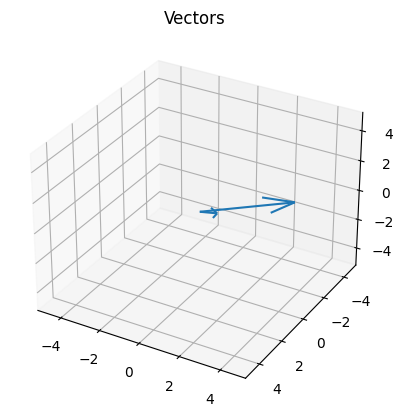

In [ ]:
fig = plt.figure()

soa = np.array([[0, 0, 0, 2, 2, 2],
                [0, 0, 0, 5, 0.7, 3]])

X, Y, Z, U, V, W = zip(*soa)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)

ax.set_xlim([-5, 5])
ax.set_ylim([5, -5])
ax.set_zlim([-5, 5])

ax.set_title("Vectors")
plt.show()

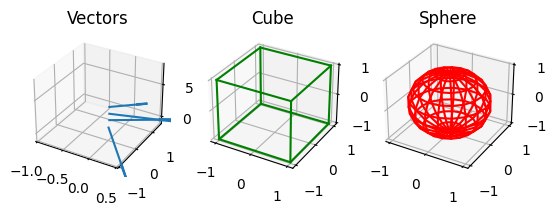

In [ ]:
fig = plt.figure()

soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
               [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
ax = fig.add_subplot(131, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
ax.set_title("Vectors")

# draw cube
ax = fig.add_subplot(132, projection='3d')
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="green")
ax.set_title("Cube")

# draw sphere
ax = fig.add_subplot(133, projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="red")
ax.set_title("Sphere")

plt.show()

### Note:

- All joint angles are relative to their parent (previous) links

## Task-3
Write a python code incorporating the above calculation that can return the position vector of the end effector for any given configuration of joint variables (angles and extension).

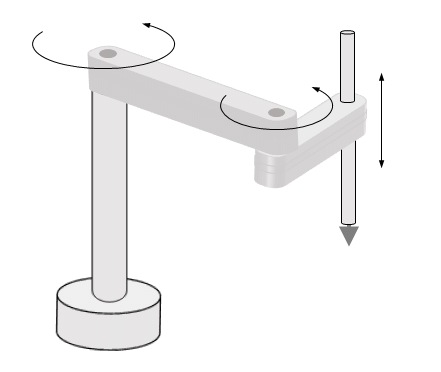


#### Showing combined rotation matrix for RRP SCARA

1. Rotation about Z-axis with angle `q1` & Translation about height `L[0]` (in Z-dir)
2. Rotation about Z-axis with angle `q2` & Translation about link-1 length `L[1]` (in X-dir)  
3. No Rotation & only Translation about link-2 length `L[2]` (in X-dir)


In [ ]:
d = 2
L = [1, 1, 1  ]
q = [30, -30, 0]

points = [np.array([0, 0, 0])]

P3 = np.array([0, 0, -d, 1])

Hi = [
    H.from_euler('z', q[0], [0, 0, L[0]]),
    H.from_euler('z', q[1], [L[1], 0, 0]),
    H.from_euler('z', q[2], [L[2], 0, 0])
]

print("Homogeneous Transformation Matrices : \n")
Hi

Homogeneous Transformation Matrices : 



[array([[ 0.87, -0.50,  0.00,  0.00],
        [ 0.50,  0.87,  0.00,  0.00],
        [ 0.00,  0.00,  1.00,  1.00],
        [ 0.00,  0.00,  0.00,  1.00]]),
 array([[ 0.87,  0.50,  0.00,  1.00],
        [-0.50,  0.87,  0.00,  0.00],
        [ 0.00,  0.00,  1.00,  0.00],
        [ 0.00,  0.00,  0.00,  1.00]]),
 array([[ 1.00, -0.00,  0.00,  1.00],
        [ 0.00,  1.00,  0.00,  0.00],
        [ 0.00,  0.00,  1.00,  0.00],
        [ 0.00,  0.00,  0.00,  1.00]])]

In [ ]:
Hr = np.eye(4, 4)
I = np.array([0, 0, 0, 1])

for i in range(len(Hi)):
  Hr = Hr@Hi[i]
  points.append((Hr@I)[0:3])

print("Final Homogeneous Transformation Matrix")
Hr

Final Homogeneous Transformation Matrix


array([[ 1.00, -0.00,  0.00,  1.87],
       [-0.00,  1.00,  0.00,  0.50],
       [ 0.00,  0.00,  1.00,  1.00],
       [ 0.00,  0.00,  0.00,  1.00]])

In [ ]:
P0 = Hr@P3

points.append(P0[0:3])
points, P0[0:3]

([array([0, 0, 0]),
  array([ 0.00,  0.00,  1.00]),
  array([ 0.87,  0.50,  1.00]),
  array([ 1.87,  0.50,  1.00]),
  array([ 1.87,  0.50, -1.00])],
 array([ 1.87,  0.50, -1.00]))

In [ ]:
r = get_rot_mat(Hr)
#r.as_matrix()
r.as_euler('xyz', degrees=True)

array([ 0.00,  0.00,  0.00])

[[ 0.00  0.00  0.00]
 [ 0.00  0.00  1.00]
 [ 0.87  0.50  1.00]
 [ 1.87  0.50  1.00]
 [ 1.87  0.50 -1.00]]


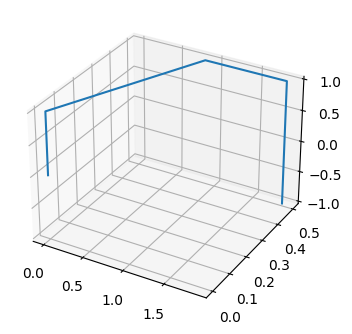

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')


[X, Y, Z] = np.array(points).transpose()
print(np.array([X, Y, Z]).transpose())

ax.plot(X, Y, Z) # plot the point (2,3,4) on the figure
plt.show()

## Task-4

Repeat the above exercise for the Stanford-type RRP configuration, again
write a python code that can return the position vector of the end effector
for any given configuration of joint variables (angles and extension).

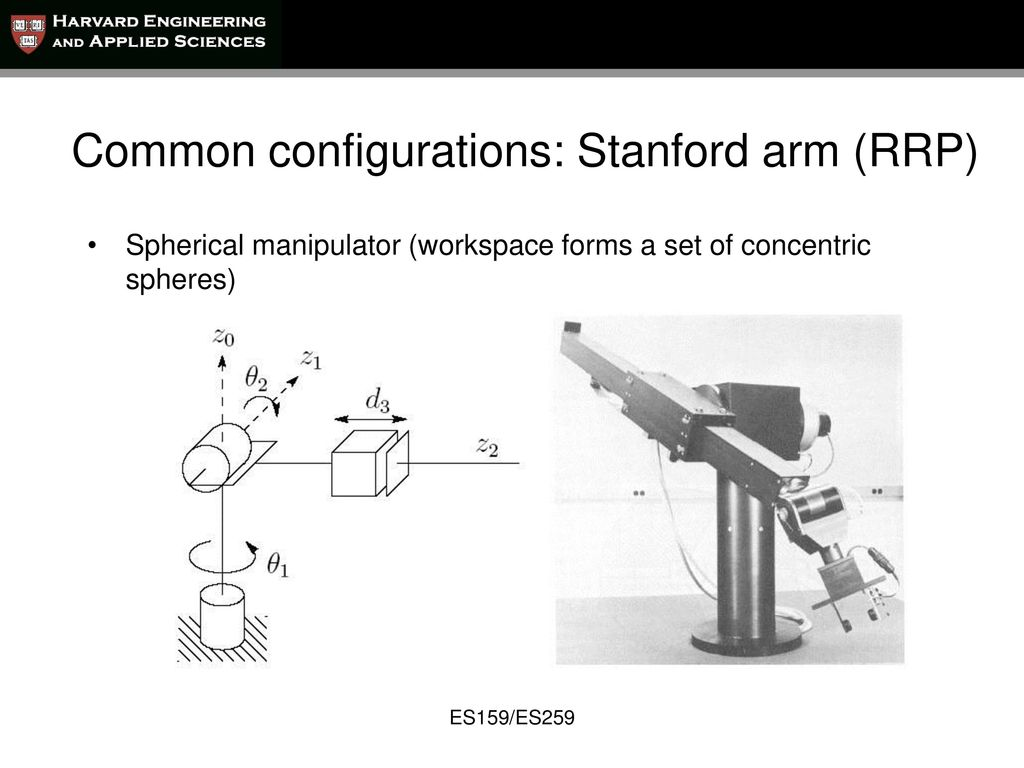


#### Showing combined rotation matrix for Stanford Type RRP Arm

1. Rotation about Z-axis with angle `θ1` & No Translation
2. Rotation about Z-axis with angle `θ2` & Translation about link-1 length `L[0]` (in Z-dir)
3. No Rotation & only Translation about link-2 length `L[1]` (in X-dir)  


*   List item
*   List item



In [ ]:
d = 2
L = [0, 2, 2  ]
q = [-30, 30, 0]

points = [np.array([0, 0, 0])]

P3 = np.array([d, 0, 0, 1])

Hi = [
    H.from_euler('z', q[0], [0, 0, 0]),
    H.from_euler('y', q[1], [0, 0, L[1]]),
    H.from_euler('x', q[2], [L[2], 0, 0])
]

print("Homogeneous Transformation Matrices : \n")
Hi

Homogeneous Transformation Matrices : 



[array([[ 0.87,  0.50,  0.00,  0.00],
        [-0.50,  0.87,  0.00,  0.00],
        [ 0.00,  0.00,  1.00,  0.00],
        [ 0.00,  0.00,  0.00,  1.00]]),
 array([[ 0.87,  0.00,  0.50,  0.00],
        [ 0.00,  1.00,  0.00,  0.00],
        [-0.50,  0.00,  0.87,  2.00],
        [ 0.00,  0.00,  0.00,  1.00]]),
 array([[ 1.00,  0.00,  0.00,  2.00],
        [ 0.00,  1.00, -0.00,  0.00],
        [ 0.00,  0.00,  1.00,  0.00],
        [ 0.00,  0.00,  0.00,  1.00]])]

In [ ]:
Hr = np.eye(4, 4)
I = np.array([0, 0, 0, 1])

for i in range(len(Hi)):
  Hr = Hr@Hi[i]
  points.append((Hr@I)[0:3])

print("Final Homogeneous Transformation Matrix")
Hr

Final Homogeneous Transformation Matrix


array([[ 0.75,  0.50,  0.43,  1.50],
       [-0.43,  0.87, -0.25, -0.87],
       [-0.50,  0.00,  0.87,  1.00],
       [ 0.00,  0.00,  0.00,  1.00]])

In [ ]:
P0 = Hr@P3

points.append(P0[0:3])
points, P0[0:3]

([array([0, 0, 0]),
  array([ 0.00,  0.00,  0.00]),
  array([ 0.00,  0.00,  2.00]),
  array([ 1.50, -0.87,  1.00]),
  array([ 3.00, -1.73,  0.00])],
 array([ 3.00, -1.73,  0.00]))

In [ ]:
r = get_rot_mat(Hr)
#r.as_matrix()
r.as_euler('xyz', degrees=True)

array([ 0.00,  30.00, -30.00])

[[ 0.00  0.00  0.00]
 [ 0.00  0.00  0.00]
 [ 0.00  0.00  2.00]
 [ 1.50 -0.87  1.00]
 [ 3.00 -1.73  0.00]]


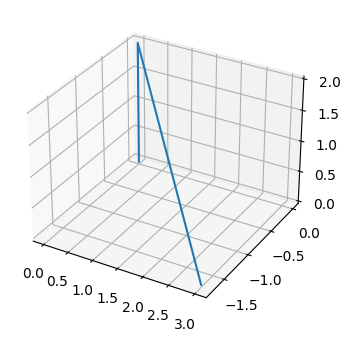

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')


[X, Y, Z] = np.array(points).transpose()
print(np.array([X, Y, Z]).transpose())

ax.plot(X, Y, Z) # plot the point (2,3,4) on the figure
plt.show()

## Task-5

A drone took off from a base station and traveled 10m straight up. If you
consider an inertial frame attached at the base station with the z axis
pointing straight up and x and y axes along the ground forming a
right-hand system, then this would be `10m in the z direction`. At this hover
point, the drone orientation is as if it completed a `30-degree rotation about
the x-axis` followed by a `60-degree rotation about the resulting new (current)
z-axis`. Further, it is then observed using a lidar installed on the drone that
an obstacle is `3m exactly above the drone (in the drone frame)`. Find the
position vector of the obstacle with respect to the base coordinate frame
using a composition of homogeneous transformations. Also, show the
choice of coordinate frames using a neat sketch.


#### Showing combined rotation matrix for obstacle above Drone

1. 10m Translation in Z-dir
2. 30° Rotation about X-axis & No Translation
3. 60° Rotation about Z-axis & No Translation

P3 = [0, 0, 3], 3m above drone  


In [ ]:
d = 3
L = [10, 0, 0 ]
q = [0, 30, 60]

points = [np.array([0, 0, 0])]

P3 = np.array([0, 0, d, 1])

Hi = [
    H.from_euler('z', q[0], [0, 0, L[0]]),
    H.from_euler('x', q[1], [0, 0, 0]),
    H.from_euler('z', q[2], [0, 0, 0])
]

print("Homogeneous Transformation Matrices : \n")
Hi

Homogeneous Transformation Matrices : 



[array([[ 1.00, -0.00,  0.00,  0.00],
        [ 0.00,  1.00,  0.00,  0.00],
        [ 0.00,  0.00,  1.00,  10.00],
        [ 0.00,  0.00,  0.00,  1.00]]),
 array([[ 1.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.87, -0.50,  0.00],
        [ 0.00,  0.50,  0.87,  0.00],
        [ 0.00,  0.00,  0.00,  1.00]]),
 array([[ 0.50, -0.87,  0.00,  0.00],
        [ 0.87,  0.50,  0.00,  0.00],
        [ 0.00,  0.00,  1.00,  0.00],
        [ 0.00,  0.00,  0.00,  1.00]])]

In [ ]:
Hr = np.eye(4, 4)
I = np.array([0, 0, 0, 1])

for i in range(len(Hi)):
  Hr = Hr@Hi[i]
  points.append((Hr@I)[0:3])

print("Final Homogeneous Transformation Matrix")
Hr

Final Homogeneous Transformation Matrix


array([[ 0.50, -0.87,  0.00,  0.00],
       [ 0.75,  0.43, -0.50,  0.00],
       [ 0.43,  0.25,  0.87,  10.00],
       [ 0.00,  0.00,  0.00,  1.00]])

In [ ]:
P0 = Hr@P3

points.append(P0[0:3])
points, P0[0:3]

([array([0, 0, 0]),
  array([ 0.00,  0.00,  10.00]),
  array([ 0.00,  0.00,  10.00]),
  array([ 0.00,  0.00,  10.00]),
  array([ 0.00, -1.50,  12.60])],
 array([ 0.00, -1.50,  12.60]))

In [ ]:
r = get_rot_mat(Hr)
#r.as_matrix()
r.as_euler('xyz', degrees=True)

array([ 16.10, -25.66,  56.31])

[[ 0.00  0.00  0.00]
 [ 0.00  0.00  10.00]
 [ 0.00  0.00  10.00]
 [ 0.00  0.00  10.00]
 [ 0.00 -1.50  12.60]]


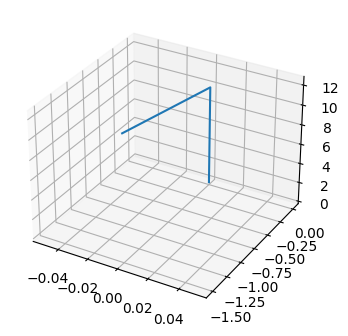

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')


[X, Y, Z] = np.array(points).transpose()
print(np.array([X, Y, Z]).transpose())

ax.plot(X, Y, Z) # plot the point (2,3,4) on the figure
plt.show()

## Task-8

Write a python code implementing Manipulator Jacobian for the RRP SCARA such that the entire Jacobian matrix is output for any given values of joint variables

In [ ]:
L = [1, 1, 1] # Height, l1, l2
q = [0, 0, 1] # q1, q2, d3

def Jacobian_RRP_SCARA(L = [1, 1, 1],
                       q = [0, 0, 1]):

  o0 = np.array([0,                                     0,                                      0     ]).transpose()
  o1 = np.array([L[1]*np.cos(np.pi * q[0] /180),        L[1]*np.sin(np.pi * q[0] /180),         L[0]  ]).transpose() + o0
  o2 = np.array([L[2]*np.cos(np.pi * (q[0]+q[1]) /180), L[2]*np.sin(np.pi * (q[0]+q[1]) /180),  0     ]).transpose() + o1
  o3 = np.array([0,                                     0,                                      -q[2] ]).transpose() + o2
  print(o0, o1, o2, o3)

  z0 = np.array([0, 0, 1]).transpose()
  z1 = z0
  z2 = -z0

  J = []

  J.append([np.cross(z0, o3-o0), z0])
  J.append([np.cross(z1, o3-o1), z1])
  J.append([z2, np.zeros(3)])

  return np.array(J).reshape(3, 6).transpose()

J = Jacobian_RRP_SCARA(L, q)
J

[0 0 0] [ 1.00  0.00  1.00] [ 2.00  0.00  1.00] [ 2.00  0.00  0.00]


array([[ 0.00, -0.00,  0.00],
       [ 2.00,  1.00,  0.00],
       [ 0.00,  0.00, -1.00],
       [ 0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00],
       [ 1.00,  1.00,  0.00]])

## Task-10

Write a python code implementing Manipulator Jacobian for the Planar RRP such that the entire Jacobian matrix is output for any given values of joint variables

In [ ]:
L = [1, 1, 1] # Height, l1, l2
q = [0, 0, 0] # q1, q2, d3

def Jacobian_RRR_Planar(L = [1, 1, 1],
                        q = [0, 0, 0]):

  o0 = np.array([0, 0, 0]).transpose()
  o1 = np.array([L[0]*np.cos(np.pi * q[0] /180),              L[0]*np.sin(np.pi * q[0] /180),             0]).transpose() + o0
  o2 = np.array([L[1]*np.cos(np.pi * (q[0]+q[1]) /180),       L[1]*np.sin(np.pi * (q[0]+q[1]) /180),      0]).transpose() + o1
  o3 = np.array([L[2]*np.cos(np.pi * (q[0]+q[1]+q[2]) /180),  L[2]*np.sin(np.pi * (q[0]+q[1]+q[2]) /180), 0]).transpose() + o2
  print(o0, o1, o2, o3)

  z0 = np.array([0, 0, 1]).transpose()
  z1 = z0
  z2 = z0

  J = []

  J.append([np.cross(z0, o3-o0), z0])
  J.append([np.cross(z1, o3-o1), z1])
  J.append([np.cross(z1, o3-o2), z2])

  return np.array(J).reshape(3, 6).transpose()

J = Jacobian_RRR_Planar(L, q)
J

[0 0 0] [ 1.00  0.00  0.00] [ 2.00  0.00  0.00] [ 3.00  0.00  0.00]


array([[ 0.00,  0.00,  0.00],
       [ 3.00,  2.00,  1.00],
       [ 0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00],
       [ 1.00,  1.00,  1.00]])

# Ref

- https://www.tutorialspoint.com/plotting-a-3d-cube-a-sphere-and-a-vector-in-matplotlib
- https://docs.mdanalysis.org/2.0.0/documentation_pages/lib/transformations.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.from_matrix.html

## Miscelleneous

In [ ]:
import numpy as np

arr1 = np.array([[1, 2], [3, 5]])
arr2 = np.array([1, 2])

np.linalg.solve(arr1, arr2)

array([-1.00,  1.00])

### [Scipy Spatial Transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html)

In [ ]:
from scipy.spatial.transform import Rotation as R
import numpy as np

np.set_printoptions(formatter={'float_kind': "{: .3f}".format})

In [ ]:
r = R.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])

r.as_matrix()

array([[ 0.000, -1.000,  0.000],
       [ 1.000,  0.000,  0.000],
       [ 0.000,  0.000,  1.000]])

In [ ]:
r.as_rotvec()

array([ 0.000,  0.000,  1.571])

In [ ]:
r.as_euler('xyz', degrees=True)

array([ 0.000,  0.000,  90.000])

In [ ]:
P0 = np.array([[ 1.00,  0.00,  0.00,  2.00],
              [ 0.00,  1.00,  0.00,  0.00],
              [ 0.00,  0.00,  1.00,  86.00],
              [ 0.00,  0.00,  0.00,  1.00]]
)


P = []
P.append(P0[0][0:3])
P.append(P0[1][0:3])
P.append(P0[2][0:3])

P

[array([ 1.000,  0.000,  0.000]),
 array([ 0.000,  1.000,  0.000]),
 array([ 0.000,  0.000,  1.000])]

In [ ]:
r = R.from_matrix(P)

In [ ]:
r = R.from_matrix([[0, -1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

In [ ]:
r.as_matrix()

array([[ 0.000, -1.000,  0.000],
       [ 1.000,  0.000,  0.000],
       [ 0.000,  0.000,  1.000]])

In [ ]:
r.as_euler('zyx', degrees=True)

array([ 90.000,  0.000,  0.000])

In [ ]:
r = R.from_rotvec(np.array([0, 0, np.pi/2]))

r.as_matrix()

array([[ 0.000, -1.000,  0.000],
       [ 1.000,  0.000,  0.000],
       [ 0.000,  0.000,  1.000]])

In [ ]:
r = R.from_euler('z', 90, degrees=True)

r.as_matrix()

array([[ 0.000, -1.000,  0.000],
       [ 1.000,  0.000,  0.000],
       [ 0.000,  0.000,  1.000]])

In [ ]:
r = R.from_euler('xyz', [
                        [0, 0, 90],
                        [0, 45, 0],
                        [45, 60, 30]
                        ], degrees=True)

r.as_matrix()

array([[[ 0.000, -1.000,  0.000],
        [ 1.000,  0.000,  0.000],
        [ 0.000,  0.000,  1.000]],

       [[ 0.707,  0.000,  0.707],
        [ 0.000,  1.000,  0.000],
        [-0.707,  0.000,  0.707]],

       [[ 0.433,  0.177,  0.884],
        [ 0.250,  0.919, -0.306],
        [-0.866,  0.354,  0.354]]])

In [ ]:
p = R.from_matrix([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]])

for i in range(len(r)):
  p = r[i] * p

p.as_matrix()

array([[ 0.177,  0.319,  0.931],
       [ 0.919, -0.393, -0.040],
       [ 0.354,  0.862, -0.362]])

In [ ]:
r[2].as_rotvec()

array([ 0.427,  1.132,  0.047])

In [ ]:
np.pi/4, np.pi/3, np.pi/6

(0.7853981633974483, 1.0471975511965976, 0.5235987755982988)

In [ ]:
# Multiple rotations can be composed using the * operator:

r1 = R.from_euler('z', 90, degrees=True)
r2 = R.from_euler('y', 45, degrees=True)
r3 = R.from_euler('xyz', [45, 60, 30], degrees=True)

print(r1.as_matrix())
print(r2.as_matrix())
print(r3.as_matrix())

[[ 0.000 -1.000  0.000]
 [ 1.000  0.000  0.000]
 [ 0.000  0.000  1.000]]
[[ 0.707  0.000  0.707]
 [ 0.000  1.000  0.000]
 [-0.707  0.000  0.707]]
[[ 0.433  0.177  0.884]
 [ 0.250  0.919 -0.306]
 [-0.866  0.354  0.354]]


In [ ]:
r3.as_euler('xyz', degrees=True)

array([ 45.000,  60.000,  30.000])

In [ ]:
v = [1, 2, 3]
r3.apply(r2.apply(v))

array([ 2.828,  2.111, -1.242])

In [ ]:
r = r3 * r2 * r1 # Note the order
r.as_matrix()

array([[ 0.177,  0.319,  0.931],
       [ 0.919, -0.393, -0.040],
       [ 0.354,  0.862, -0.362]])

In [ ]:
r.apply(v)

array([ 3.608,  0.013,  0.991])

In [ ]:
import matplotlib.pyplot as plt

def plot_rotated_axes(ax, r, name=None, offset=(0, 0, 0), scale=1):
    colors = ("#FF6666", "#005533", "#1199EE")  # Colorblind-safe RGB
    loc = np.array([offset, offset])
    for i, (axis, c) in enumerate(zip((ax.xaxis, ax.yaxis, ax.zaxis),
                                      colors)):
        axlabel = axis.axis_name
        axis.set_label_text(axlabel)
        axis.label.set_color(c)
        axis.line.set_color(c)
        axis.set_tick_params(colors=c)
        line = np.zeros((2, 3))
        line[1, i] = scale
        line_rot = r.apply(line)
        line_plot = line_rot + loc
        ax.plot(line_plot[:, 0], line_plot[:, 1], line_plot[:, 2], c)
        text_loc = line[1]*1.2
        text_loc_rot = r.apply(text_loc)
        text_plot = text_loc_rot + loc[0]
        ax.text(*text_plot, axlabel.upper(), color=c,
                va="center", ha="center")
    ax.text(*offset, name, color="k", va="center", ha="center",
            bbox={"fc": "w", "alpha": 0.8, "boxstyle": "circle"})

In [ ]:
r0 = R.identity()
r1 = R.from_euler("ZYX", [90, -30, 0], degrees=True)  # intrinsic
r2 = R.from_euler("zyx", [90, -30, 0], degrees=True)  # extrinsic

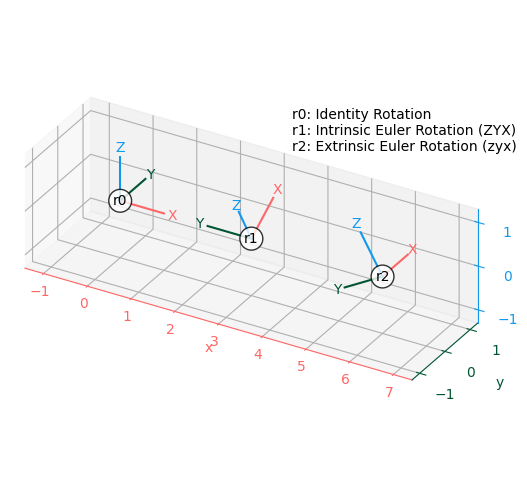

In [ ]:
ax = plt.figure().add_subplot(projection="3d", proj_type="ortho")
plot_rotated_axes(ax, r0, name="r0", offset=(0, 0, 0))
plot_rotated_axes(ax, r1, name="r1", offset=(3, 0, 0))
plot_rotated_axes(ax, r2, name="r2", offset=(6, 0, 0))
_ = ax.annotate(
    "r0: Identity Rotation\n"
    "r1: Intrinsic Euler Rotation (ZYX)\n"
    "r2: Extrinsic Euler Rotation (zyx)",
    xy=(0.6, 0.7), xycoords="axes fraction", ha="left"
)
ax.set(xlim=(-1.25, 7.25), ylim=(-1.25, 1.25), zlim=(-1.25, 1.25))
ax.set(xticks=range(-1, 8), yticks=[-1, 0, 1], zticks=[-1, 0, 1])
ax.set_aspect("equal", adjustable="box")
ax.figure.set_size_inches(6, 5)
plt.tight_layout()

### T

In [ ]:
!pip install pytransform3d


In [ ]:
from pytransform3d.transform_manager import TransformManager
from pytransform3d.editor import TransformEditor
from pytransform3d.transformations import transform_from
from pytransform3d.rotations import active_matrix_from_extrinsic_euler_xyx


tm = TransformManager()

tm.add_transform(
    "tree", "world",
    transform_from(
        active_matrix_from_extrinsic_euler_xyx([0, 0.5, 0]),
        [0, 0, 0.5]
    )
)
tm.add_transform(
    "car", "world",
    transform_from(
        active_matrix_from_extrinsic_euler_xyx([0.5, 0, 0]),
        [0.5, 0, 0]
    )
)

te = TransformEditor(tm, "world", s=0.3)
te.show()
print("tree to world:")
print(te.transform_manager.get_transform("tree", "world"))

/usr/local/lib/python3.10/dist-packages/pytransform3d/editor.py:22: UserWarning: Cannot import PyQt. TransformEditor won't be available.
  warnings.warn(


TypeError: ignored